# Import libraries and packages

In [1]:
import numpy as np
import re
import nltk
import pickle
from nltk.corpus import stopwords
import pandas as pd 
import warnings

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Data Exploration & Cleaning - 1

In [2]:
df= pd.read_csv("data/data.csv")

In [3]:
df.head()

,Tweet,Text Label
0,yeah I got 2 backups for all that. I just hate...,Non-Bullying
1,I hate using my BB but love my iPhone. Haven'...,Non-Bullying
2,Get fucking real dude.,Bullying
3,She is as dirty as they come and that crook ...,Bullying
4,why did you fuck it up. I could do it all day...,Bullying


In [4]:
df['label'] = df['Text Label'].map({'Non-Bullying': 0, 'Bullying': 1})
df['message']=df['Tweet']
df.drop(['Text Label','Tweet'],axis=1,inplace=True)

# Visualization

In [5]:
import seaborn as sns
sns.countplot(x="label", data = df)

In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [7]:
comment_words = ''
stopwords = set(STOPWORDS)

In [8]:
for val in df.message:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

In [9]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

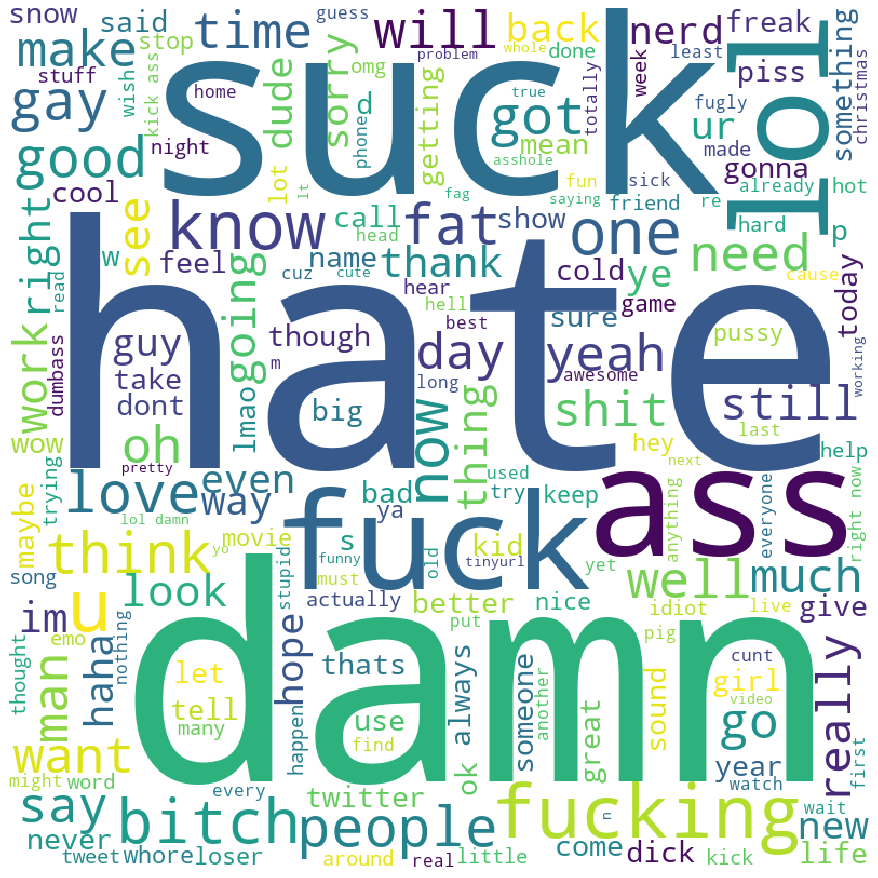

In [10]:
# plot the WordCloud image                      
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Feature Selection - Formal DAta

In [11]:
X = df['message']
y = df['label']

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Vectorizing the Sentence

In [13]:
cv = CountVectorizer()
X = cv.fit_transform(X) # Fit the Data

# Splitting Data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
print(X_test.shape)
print(y_test.shape)

(3462, 15415)
(3462,)


# Machine Learning

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings

# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
LogisticR = LogisticRegression()
LogisticR.fit(X_train, y_train) 
y_pred = LogisticR.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
LR = accuracy_score(y_test, y_pred)
a = accuracy_score(y_test,y_pred)*100
p = precision_score(y_test, y_pred,average='macro') * 100
r = recall_score(y_test, y_pred,average='macro') * 100
f = f1_score(y_test, y_pred,average='macro') * 100

[[1906  387]
 [ 660  509]]
              precision    recall  f1-score   support

           0       0.74      0.83      0.78      2293
           1       0.57      0.44      0.49      1169

    accuracy                           0.70      3462
   macro avg       0.66      0.63      0.64      3462
weighted avg       0.68      0.70      0.69      3462

0.6975736568457539


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# SVM 

In [18]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train, y_train) 
y_pred = SVM.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
SVM = accuracy_score(y_test, y_pred)
a1 = accuracy_score(y_test,y_pred)*100
p1 = precision_score(y_test, y_pred,average='macro') * 100
r1 = recall_score(y_test, y_pred,average='macro') * 100
f1 = f1_score(y_test, y_pred,average='macro') * 100

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[2293    0]
 [1169    0]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.80      2293
           1       0.00      0.00      0.00      1169

    accuracy                           0.66      3462
   macro avg       0.33      0.50      0.40      3462
weighted avg       0.44      0.66      0.53      3462

0.6623339110340843


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Xgboost

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
clf = accuracy_score(y_test, y_pred)
a2 = accuracy_score(y_test,y_pred)*100
p2 = precision_score(y_test, y_pred,average='macro') * 100
r2 = recall_score(y_test, y_pred,average='macro') * 100
f2 = f1_score(y_test, y_pred,average='macro') * 100

[[2082  211]
 [ 905  264]]
              precision    recall  f1-score   support

           0       0.70      0.91      0.79      2293
           1       0.56      0.23      0.32      1169

    accuracy                           0.68      3462
   macro avg       0.63      0.57      0.55      3462
weighted avg       0.65      0.68      0.63      3462

0.6776429809358753


# MLP Classifier 

In [20]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(X_train, y_train) 
y_pred = mlp.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
mlp = accuracy_score(y_test, y_pred)
a3 = accuracy_score(y_test,y_pred)*100
p3 = precision_score(y_test, y_pred,average='macro') * 100
r3 = recall_score(y_test, y_pred,average='macro') * 100
f3 = f1_score(y_test, y_pred,average='macro') * 100

[[1684  609]
 [ 598  571]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.74      2293
           1       0.48      0.49      0.49      1169

    accuracy                           0.65      3462
   macro avg       0.61      0.61      0.61      3462
weighted avg       0.65      0.65      0.65      3462

0.6513575967648758


# Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=10, random_state=0)
RandomForest.fit(X_train, y_train) 
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
RF = accuracy_score(y_test, y_pred)
a4 = accuracy_score(y_test,y_pred)*100
p4 = precision_score(y_test, y_pred,average='macro') * 100
r4 = recall_score(y_test, y_pred,average='macro') * 100
f4 = f1_score(y_test, y_pred,average='macro') * 100

[[1684  609]
 [ 598  571]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.74      2293
           1       0.48      0.49      0.49      1169

    accuracy                           0.65      3462
   macro avg       0.61      0.61      0.61      3462
weighted avg       0.65      0.65      0.65      3462

0.6513575967648758


# AdaBoost Classifier

In [22]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier(n_estimators=100, random_state=0)
AdaBoost.fit(X_train, y_train)
AdaBoostClassifier(n_estimators=100, random_state=0)
y_pred = AdaBoost.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
AB= accuracy_score(y_test, y_pred)
a5 = accuracy_score(y_test,y_pred)*100
p5 = precision_score(y_test, y_pred,average='macro') * 100
r5 = recall_score(y_test, y_pred,average='macro') * 100
f5 = f1_score(y_test, y_pred,average='macro') * 100

[[1968  325]
 [ 690  479]]
              precision    recall  f1-score   support

           0       0.74      0.86      0.79      2293
           1       0.60      0.41      0.49      1169

    accuracy                           0.71      3462
   macro avg       0.67      0.63      0.64      3462
weighted avg       0.69      0.71      0.69      3462

0.7068168688619295


# SGD Classifier

In [23]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
SGD.fit(X_train, y_train)
SGDClassifier(max_iter=5)
y_pred = SGD.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
SGDA = accuracy_score(y_test, y_pred)
a6 = accuracy_score(y_test,y_pred)*100
p6 = precision_score(y_test, y_pred,average='macro') * 100
r6 = recall_score(y_test, y_pred,average='macro') * 100
f6 = f1_score(y_test, y_pred,average='macro') * 100

[[1572  721]
 [ 498  671]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.72      2293
           1       0.48      0.57      0.52      1169

    accuracy                           0.65      3462
   macro avg       0.62      0.63      0.62      3462
weighted avg       0.67      0.65      0.65      3462

0.64789139225881


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


# KNeighbors Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
KNNA = accuracy_score(y_test, y_pred)
a7 = accuracy_score(y_test,y_pred)*100
p7 = precision_score(y_test, y_pred,average='macro') * 100
r7 = recall_score(y_test, y_pred,average='macro') * 100
f7 = f1_score(y_test, y_pred,average='macro') * 100

[[1035 1258]
 [ 361  808]]
              precision    recall  f1-score   support

           0       0.74      0.45      0.56      2293
           1       0.39      0.69      0.50      1169

    accuracy                           0.53      3462
   macro avg       0.57      0.57      0.53      3462
weighted avg       0.62      0.53      0.54      3462

0.5323512420566147


# Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train, y_train)
y_pred = DecisionTree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
DT = accuracy_score(y_test, y_pred)
a8 = accuracy_score(y_test,y_pred)*100
p8 = precision_score(y_test, y_pred,average='macro') * 100
r8 = recall_score(y_test, y_pred,average='macro') * 100
f8 = f1_score(y_test, y_pred,average='macro') * 100

[[1659  634]
 [ 591  578]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      2293
           1       0.48      0.49      0.49      1169

    accuracy                           0.65      3462
   macro avg       0.61      0.61      0.61      3462
weighted avg       0.65      0.65      0.65      3462

0.646158290005777


# Multinomial Naive Bayes

In [26]:
from sklearn.naive_bayes import MultinomialNB
MultinomialNB = MultinomialNB()
MultinomialNB.fit(X_train, y_train)
y_pred = MultinomialNB.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
MNB = accuracy_score(y_test, y_pred)
a9 = accuracy_score(y_test,y_pred)*100
p9 = precision_score(y_test, y_pred,average='macro') * 100
r9 = recall_score(y_test, y_pred,average='macro') * 100
f9 = f1_score(y_test, y_pred,average='macro') * 100

[[2057  236]
 [ 911  258]]
              precision    recall  f1-score   support

           0       0.69      0.90      0.78      2293
           1       0.52      0.22      0.31      1169

    accuracy                           0.67      3462
   macro avg       0.61      0.56      0.55      3462
weighted avg       0.64      0.67      0.62      3462

0.6686886192952051


# Voting Classifier

In [27]:
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.svm import SVC
kfold = model_selection.KFold(n_splits=10)
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = RandomForestClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
warnings.simplefilter("ignore")

print(ensemble)
ensemble.fit(X_train, y_train)

y_pred = ensemble.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

E= accuracy_score(y_test, y_pred)
a10 = accuracy_score(y_test,y_pred)*100
p10 = precision_score(y_test, y_pred,average='macro') * 100
r10 = recall_score(y_test, y_pred,average='macro') * 100
f10 = f1_score(y_test, y_pred,average='macro') * 100

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('cart',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion...
                                        

In [28]:
import pickle
pickle.dump(RandomForest,open('model.pkl','wb'))

# Machine Learning Comparison

# Accuracy 

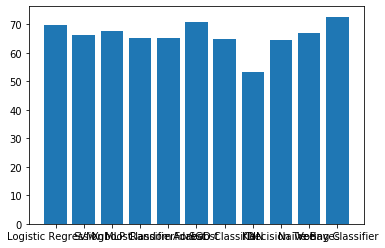

In [29]:
height = [a,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10]
bars = ('Logistic Regression','SVM','Xgboost','MLP Classifier','Random Forest','Adaboost','SGD Classifier','KNN','Decision Tree','Naive Bayes','Voting Classifier')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.show()

# Precision

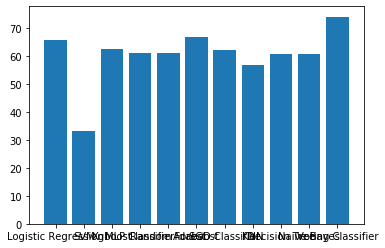

In [30]:
height = [p,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10]
bars = ('Logistic Regression','SVM','Xgboost','MLP Classifier','Random Forest','Adaboost','SGD Classifier','KNN','Decision Tree','Naive Bayes','Voting Classifier')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.show()

# Recall

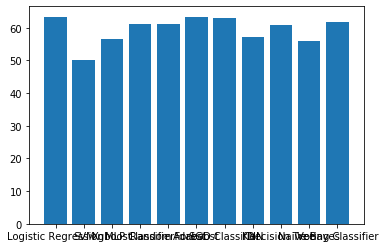

In [31]:
height = [r,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10]
bars = ('Logistic Regression','SVM','Xgboost','MLP Classifier','Random Forest','Adaboost','SGD Classifier','KNN','Decision Tree','Naive Bayes','Voting Classifier')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.show()

# F1 Score

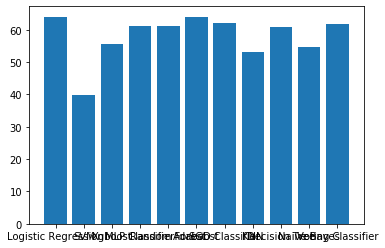

In [32]:
height = [f,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10]
bars = ('Logistic Regression','SVM','Xgboost','MLP Classifier','Random Forest','Adaboost','SGD Classifier','KNN','Decision Tree','Naive Bayes','Voting Classifier')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.show()

# Deep Learning

In [33]:
df= pd.read_csv("data/data.csv")
df.head()

,Tweet,Text Label
0,yeah I got 2 backups for all that. I just hate...,Non-Bullying
1,I hate using my BB but love my iPhone. Haven'...,Non-Bullying
2,Get fucking real dude.,Bullying
3,She is as dirty as they come and that crook ...,Bullying
4,why did you fuck it up. I could do it all day...,Bullying


In [34]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Text Label']= label_encoder.fit_transform(df['Text Label'])
df['Text Label'].unique()

array([1, 0], dtype=int64)

In [35]:
# Attribute and Labels
tweet_df = df[['Tweet','Text Label']]
#tweet_df = tweet_df[tweet_df['airline_sentiment'] != 'neutral']
X = tweet_df.Tweet
y = tweet_df['Text Label']

In [36]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Getting required labels only and encoding

review_labels_train = y_train.factorize()

In [38]:
# Check Review Labels
review_labels_train[1]

Int64Index([1, 0], dtype='int64')

In [39]:
# Importing required tf modules
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
vocab = X_train.values

In [40]:
# Vectorize a text corpus, by turning each text into sequence of integers

tokenizer = Tokenizer(num_words=8000,oov_token='OOV')
tokenizer.fit_on_texts(vocab)

vocab_size = len(tokenizer.word_index) + 1

print(tokenizer)
print(vocab_size)

13989


In [41]:
# Store and Padding Converted Sequences
tweet = X_train.values

tweet_seqs = tokenizer.texts_to_sequences(tweet)

padded_sequence_train = pad_sequences(tweet_seqs, maxlen=200)
print(padded_sequence_train)

[[   0    0    0 ...  409 1255 5418]
 [   0    0    0 ...    0    0 5419]
 [   0    0    0 ...   96    3 5421]
 ...
 [   0    0    0 ...    4 5346    1]
 [   0    0    0 ... 3868 1379 1182]
 [   0    0    0 ...  859  269    1]]


# LSTM

In [42]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length,     
                                     input_length=X_train.shape[0]) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 8391, 32)          447648    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 8391, 32)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                16600     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 464,299
Trainable params: 464,299
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
trained = model.fit(padded_sequence_train,review_labels_train[0],
                  validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
210/210 [==============================] - 103s 490ms/step - loss: 0.6128 - accuracy: 0.6970 - val_loss: 0.5979 - val_accuracy: 0.7088
Epoch 2/10
210/210 [==============================] - 2293s 11s/step - loss: 0.5517 - accuracy: 0.7293 - val_loss: 0.5828 - val_accuracy: 0.7207
Epoch 3/10
210/210 [==============================] - 96s 458ms/step - loss: 0.4964 - accuracy: 0.7743 - val_loss: 0.5807 - val_accuracy: 0.7141
Epoch 4/10
210/210 [==============================] - 163s 776ms/step - loss: 0.4363 - accuracy: 0.8035 - val_loss: 0.6033 - val_accuracy: 0.7266
Epoch 5/10
210/210 [==============================] - 78s 372ms/step - loss: 0.3855 - accuracy: 0.8321 - val_loss: 0.6180 - val_accuracy: 0.7141
Epoch 6/10
210/210 [==============================] - 77s 365ms/step - loss: 0.3373 - accuracy: 0.8576 - val_loss: 0.6803 - val_accuracy: 0.7028
Epoch 7/10
210/210 [==============================] - 73s 349ms/step - loss: 0.3028 - accuracy: 0.8723 - val_loss: 0.7328 - val_

In [44]:
encoded_docs = tokenizer.texts_to_sequences(X_test)
padded_sequence_test = pad_sequences(encoded_docs, maxlen=200)
print(padded_sequence_test)

[[  0   0   0 ...  14 104   1]
 [  0   0   0 ... 461  44 171]
 [  0   0   0 ...  36 591  29]
 ...
 [  0   0   0 ...   1 859 269]
 [  0   0   0 ...  15   7 402]
 [  0   0   0 ...   0   0 185]]


In [45]:
sentiment_label_test = y_test.factorize()
sentiment_label_test[0]

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [46]:
score = model.evaluate(padded_sequence_test,sentiment_label_test[0],verbose=0)
lstm_acc = score[1]
lstm_acc

0.6901811361312866

# RNN

In [47]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [48]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [49]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(256)(layer)
    layer = Dense(128,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.2)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [50]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               314368    
_________________________________________________________________
FC1 (Dense)                  (None, 128)               32896     
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                

In [51]:
model.fit(sequences_matrix,y_train,batch_size=128,epochs=2,
          validation_split=0.2)

Epoch 1/2
53/53 [==============================] - 63s 1s/step - loss: 0.6068 - accuracy: 0.6993 - val_loss: 0.6007 - val_accuracy: 0.7064
Epoch 2/2
53/53 [==============================] - 73s 1s/step - loss: 0.5590 - accuracy: 0.7341 - val_loss: 0.5770 - val_accuracy: 0.7207


In [52]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [53]:
accr = model.evaluate(test_sequences_matrix,y_test)

66/66 [==============================] - 13s 201ms/step - loss: 0.5584 - accuracy: 0.7336


# BiDirectional LSTM

In [54]:
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length,     
                                     input_length=X_train.shape[0]))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
model.fit(sequences_matrix,y_train,batch_size=128,epochs=2,
          validation_split=0.2)

Epoch 1/2
53/53 [==============================] - 436s 8s/step - loss: 0.6344 - accuracy: 0.6618 - val_loss: 0.6085 - val_accuracy: 0.6998
Epoch 2/2
53/53 [==============================] - 22s 416ms/step - loss: 0.5878 - accuracy: 0.7104 - val_loss: 0.5864 - val_accuracy: 0.7105


In [56]:
acc_bils = model.evaluate(test_sequences_matrix,y_test)

66/66 [==============================] - 2s 26ms/step - loss: 0.5735 - accuracy: 0.7269


# CNN

In [57]:
from keras.models import Sequential
from keras.layers import Dense,Conv1D,MaxPooling1D
from keras.layers import LSTM,Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import ModelCheckpoint
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length,     
                                     input_length=X_train.shape[0]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
filepath="weights_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max',save_weights_only=True)
callbacks_list = [checkpoint]

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 8391, 32)          447648    
_________________________________________________________________
conv1d (Conv1D)              (None, 8391, 32)          3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4195, 32)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 504,053
Trainable params: 504,053
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(sequences_matrix,y_train,batch_size=128,epochs=10,
          validation_split=0.2)

Epoch 1/10
53/53 [==============================] - 8s 147ms/step - loss: 0.6323 - accuracy: 0.6640 - val_loss: 0.6093 - val_accuracy: 0.6617
Epoch 2/10
53/53 [==============================] - 11s 200ms/step - loss: 0.5819 - accuracy: 0.6993 - val_loss: 0.5856 - val_accuracy: 0.7117
Epoch 3/10
53/53 [==============================] - 7s 136ms/step - loss: 0.5488 - accuracy: 0.7369 - val_loss: 0.5898 - val_accuracy: 0.7201
Epoch 4/10
53/53 [==============================] - 9s 170ms/step - loss: 0.5211 - accuracy: 0.7519 - val_loss: 0.5954 - val_accuracy: 0.7070
Epoch 5/10
53/53 [==============================] - 9s 173ms/step - loss: 0.4997 - accuracy: 0.7625 - val_loss: 0.6117 - val_accuracy: 0.7022
Epoch 6/10
53/53 [==============================] - 9s 171ms/step - loss: 0.4754 - accuracy: 0.7788 - val_loss: 0.6247 - val_accuracy: 0.7207
Epoch 7/10
53/53 [==============================] - 10s 185ms/step - loss: 0.4485 - accuracy: 0.7950 - val_loss: 0.6429 - val_accuracy: 0.6945
Epoc

In [ ]:
acc_hyb = model.evaluate(test_sequences_matrix,y_test)

# Accuracy Comparsion

In [ ]:
score = [LR*100, RF*100, AB*100, SGDA*100, KNNA*100, DT*100, MNB*100, E*100, SVM*100, clf*100,mlp*100,lstm_acc*100,accr[0]*100,acc_bils[0]*100,acc_hyb[0]*100]
classifier = ('Logistic Regression' , 'Random Forest', 'AdaBoost Classifier', 'SGD Classifier', 'KNN', 'Decision Tree', 'MNB', 'Voting Classifier','SVM','Xgboost','MLP','LSTM','RNN','BiDirectionalLSTM','CNN')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

In [ ]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Accuracy Comparison')
plt2.show()